# BEAMSETI Functionality & Workflow Tutorial

Written by Matti Weiss

This notebook demonstrates the four core BEAMSETI data processing functions and two visualization
functions for SETI survey analysis, based on empirical and statistical catalog approaches.

Below are 2 figures illustrating the motivation for this project, showing an example survey field for nearby star HIP101382 with neighbors in the Gaia DR3 catalog. In total, 429 Gaia sources are found within the GBT-L receiver’s 8.4’ FWHM (red circle). Above: Pan‑STARRS g-band image fetched via Aladin with Gaia stars (green crosses). Below: Gaia DR3 stars with their separation-scaled beam responses.


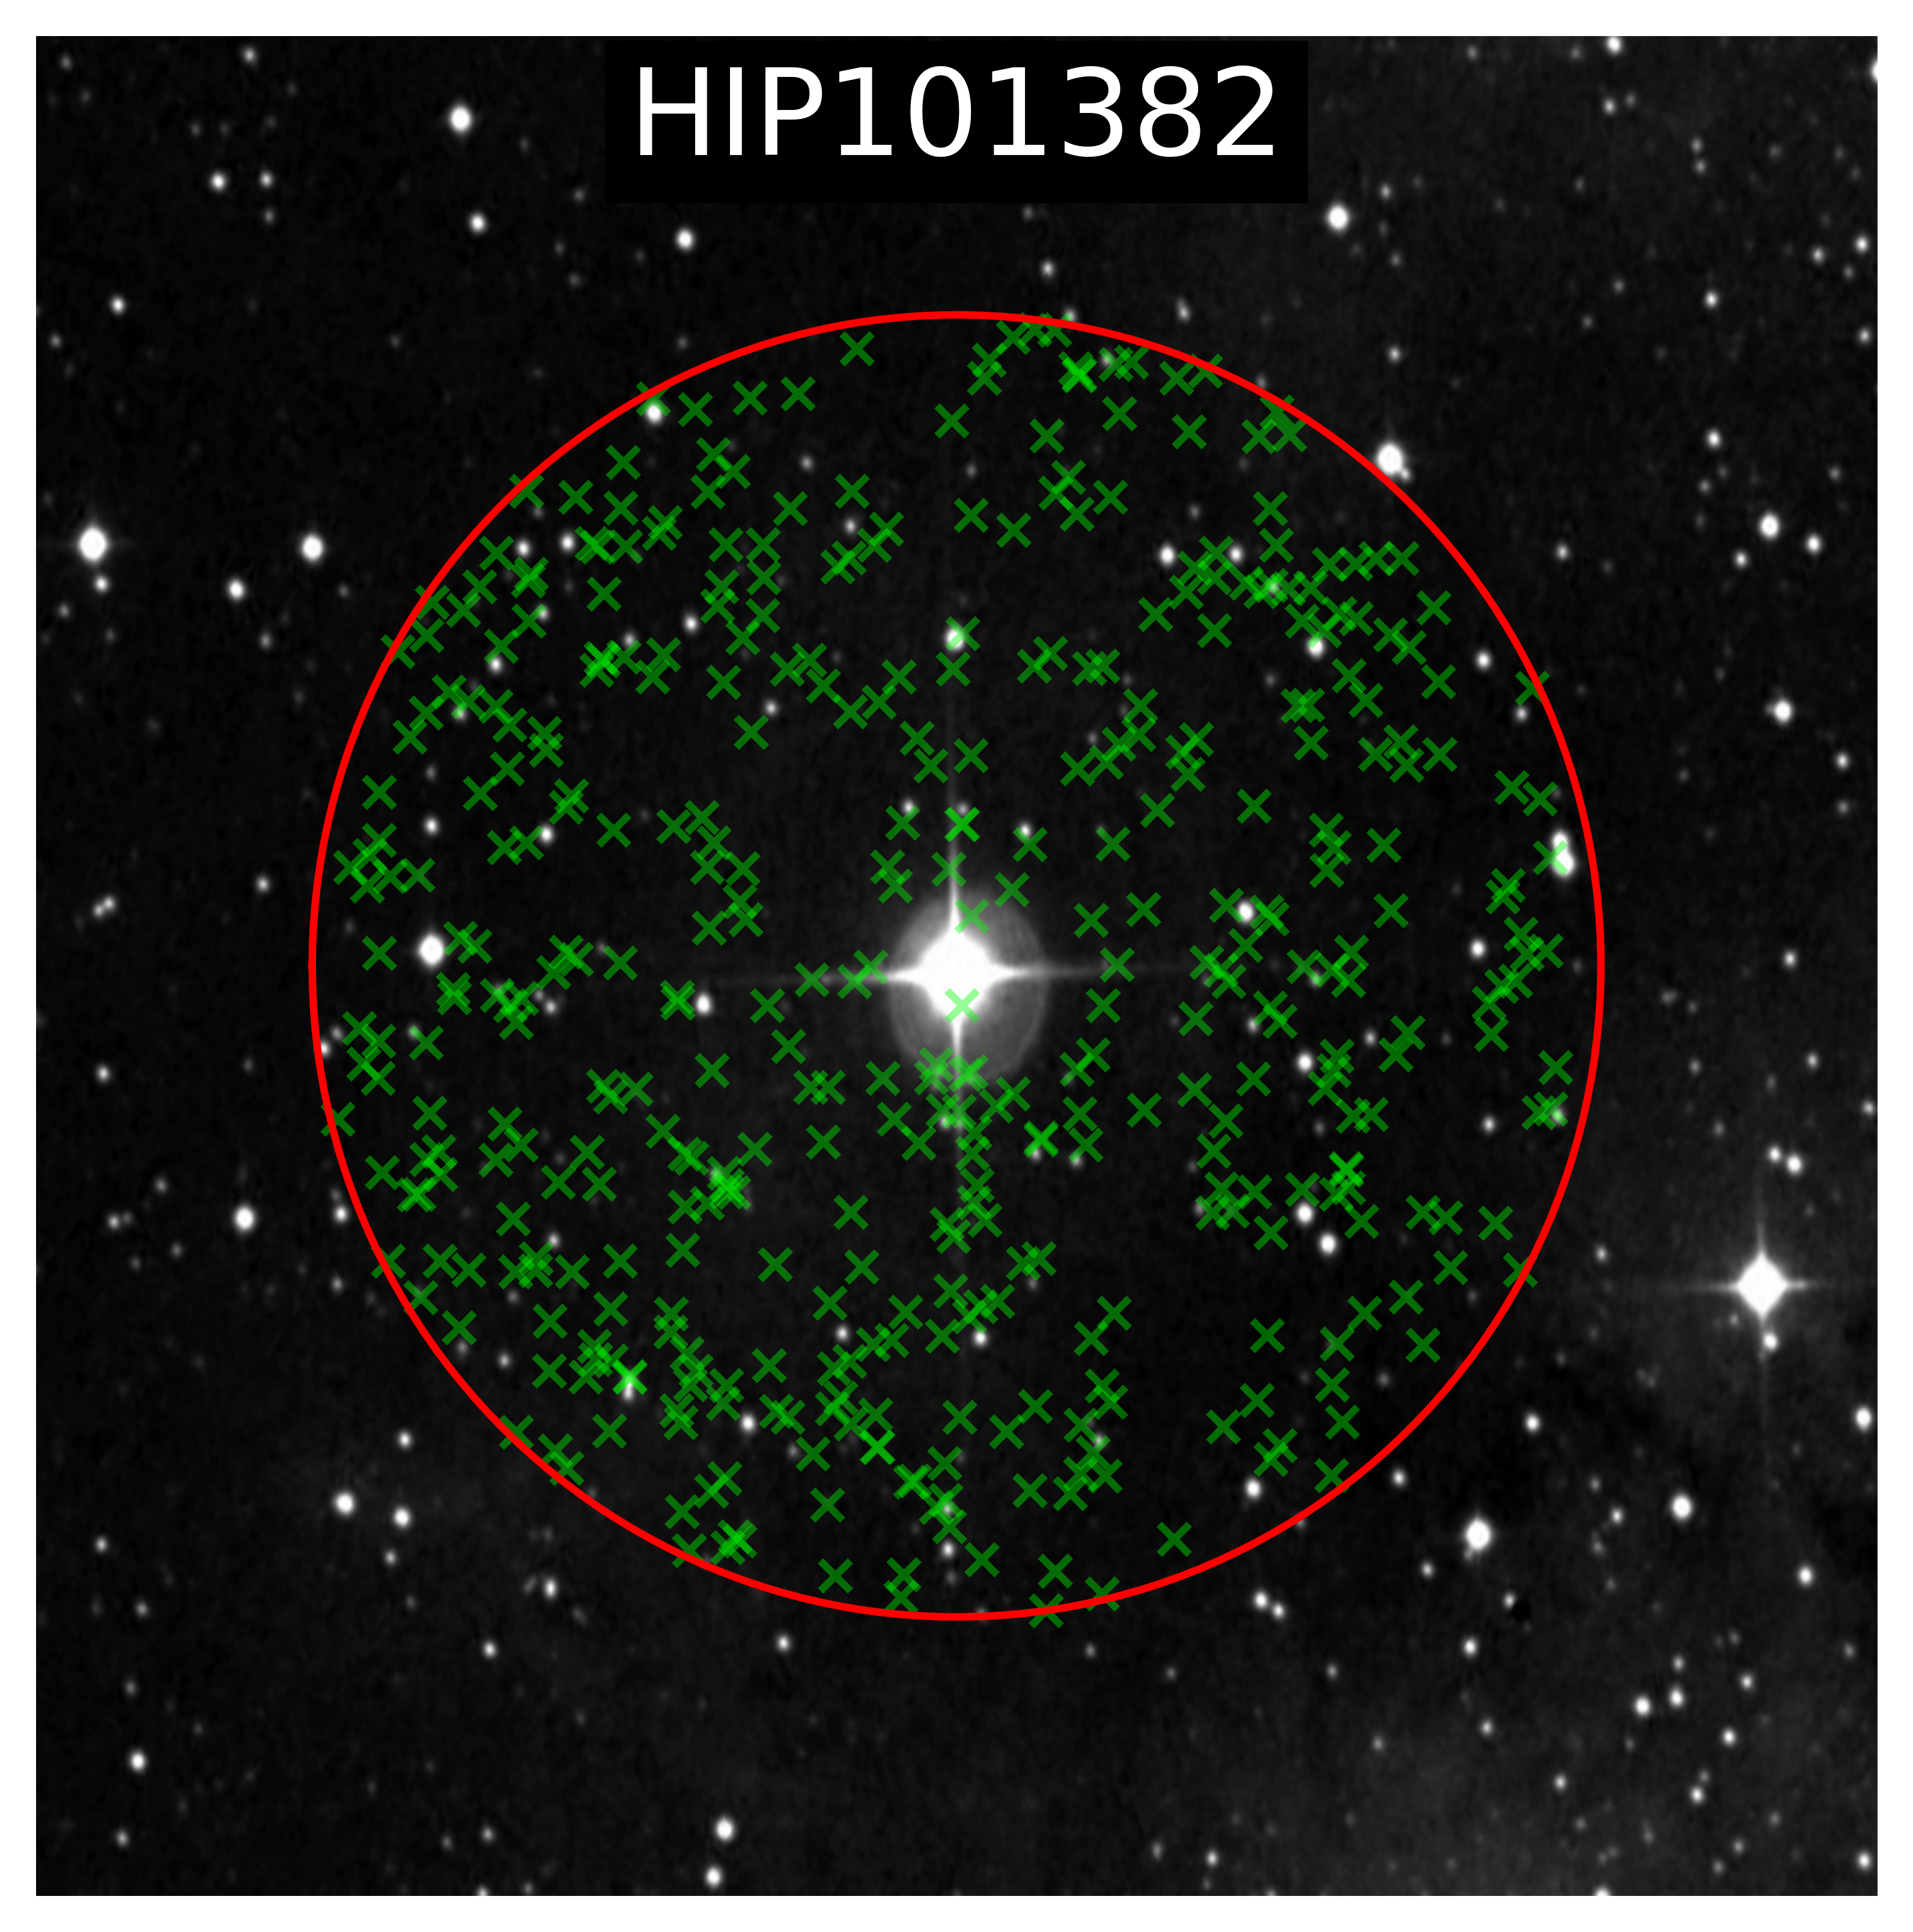

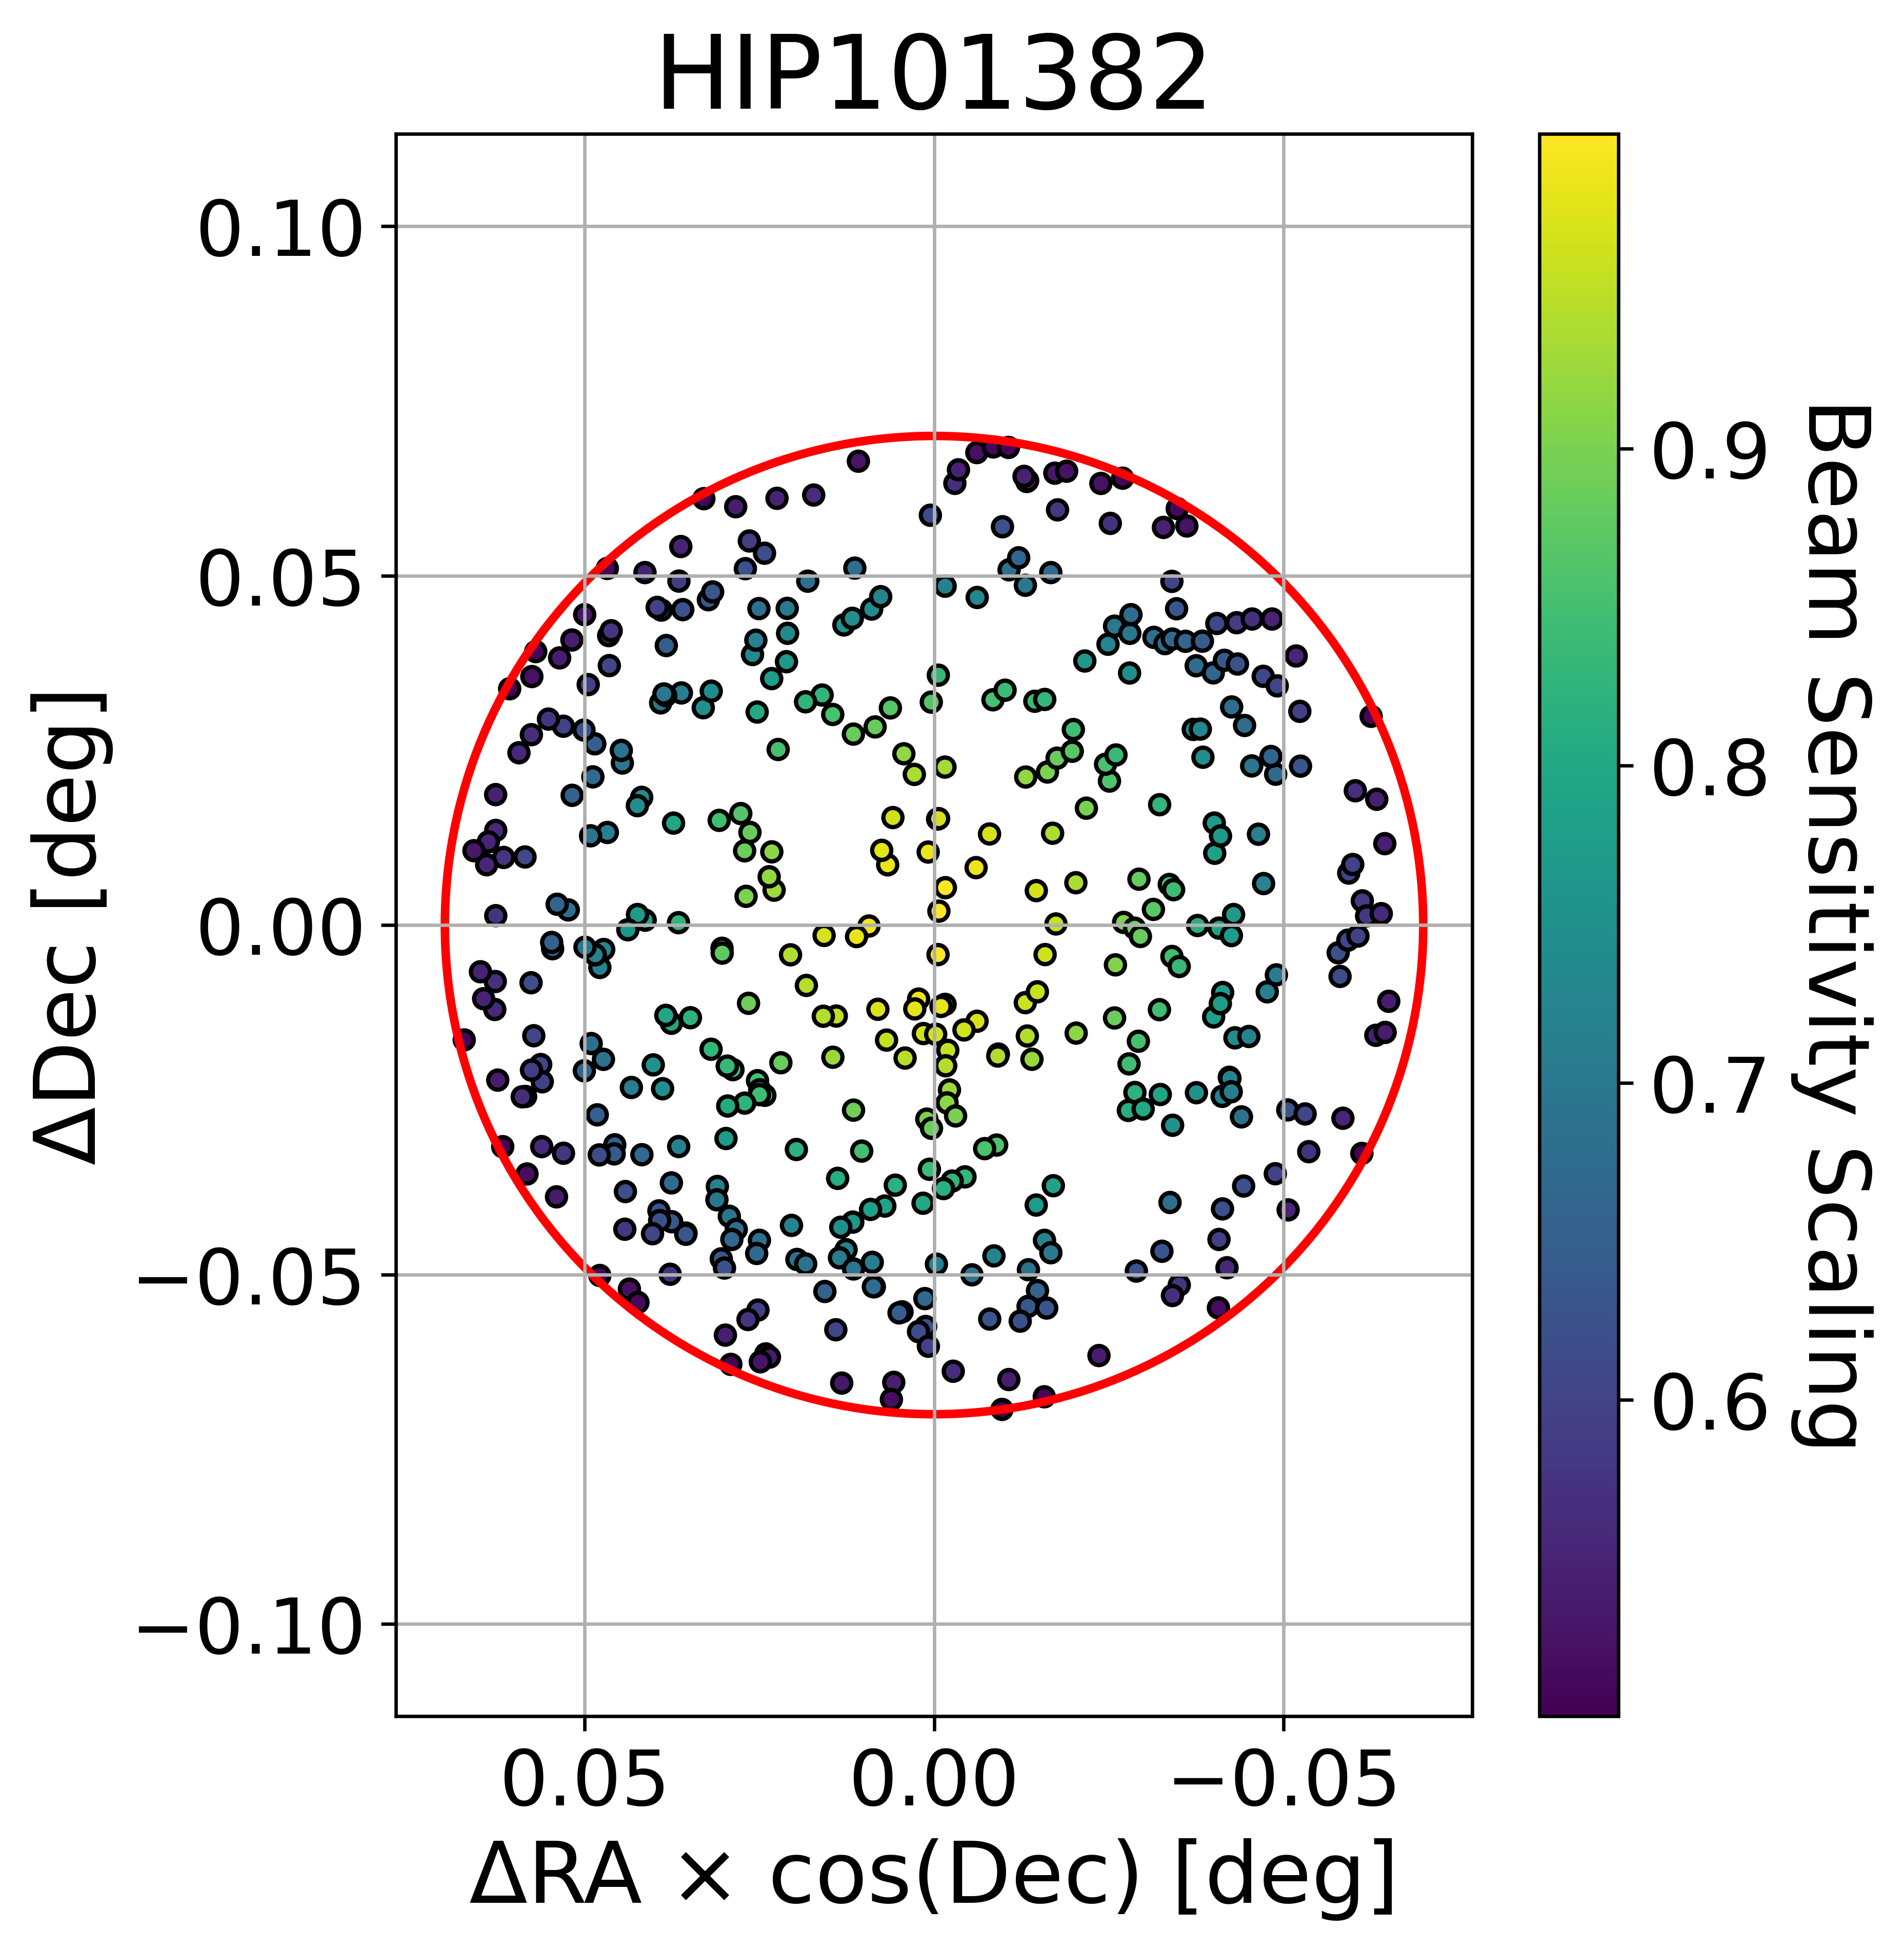

And below is a flowchart describing the methodology of the 4 key pipelines and 2 subsequent plotting functions

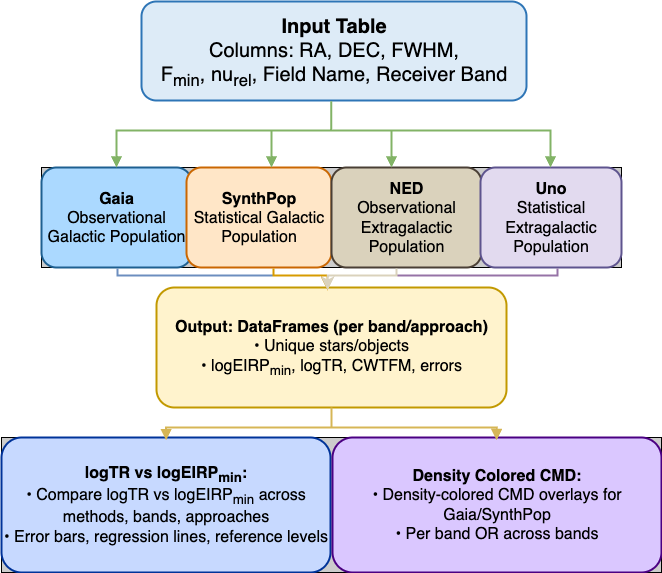

# Prerequisites & Imports

Instructions for installation and setup (see README)

Import core functions:

In [1]:
from beamseti import process_gaia, process_synthpop, process_ned, process_uno
from beamseti.plotting import plot_logTR_vs_logEIRPmin, plot_density_colored_cmd_catalog_compare
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Calling each function

## Empirical Galactic Pipeline: process_gaia
(see docstring for specifics of inputs/outputs, notes, and references)

In [45]:
gaia_df = pd.read_csv('data.csv')
stars_gaia_dict, shell_results_gaia_dict = process_gaia(gaia_df, split_by_band=True)
stars_gaia['band1']...  # Each band dataframe can be accessed like this
shell_results_gaia_dict['band1']...

## Statistical Galactic Pipeline: process_synthpop
(see docstring for specifics of inputs/outputs, notes, and references)

In [ ]:
synthpop_df = pd.read_csv('data.csv')
stars_synthpop_dict, shell_results_synthpop_dict = process_synthpop(synthpop_df, limit_distance_pc=25000, split_by_band=True)
stars_synthpop_dict['band1']...   
shell_results_synthpop['band1']...

## Empirical Extragalactic Pipeline: process_ned
(see docstring for specifics of inputs/outputs, notes, and references)

In [ ]:
ned_df = pd.read_csv('data.csv')
galaxies_ned_dict, type_counts_ned_dict, summary_ned_dict, shell_results_ned_dict = process_ned(ned_df, split_by_band=True)
galaxies_ned_dict['band1']...
type_counts_ned_dict['band1']...
summary_ned_dict['band1']...
shell_results_ned_dict['band1']...

## Statistical Extragalactic Pipeline: process_uno
(see docstring for specifics of inputs/outputs, notes, and references)

In [ ]:
uno_df = pd.read_csv('data.csv')
uno_summary_dict = process_uno(
    uno_df,
    log_rho_dict={'lower': 8.443, 'nominal': 8.473, 'upper': 8.653},
    split_by_band=True,
    verbose=True
)
uno_summary_dict['band1']...

## Comparative Visualization: plot_logTR_vs_logEIRPmin
(see docstring for specifics of inputs/outputs, notes, and references)

Assuming an overlaid plot of unique (approach, band) points:

In [47]:
fig_tr = plot_logTR_vs_logEIRPmin(
    {'Gaia': {'band1': shell_results_gaia_dict['band1'], ...}, 'SynthPop': {'band1': shell_results_synthpop['band1'], ...},...})
# Show plot: fig_tr[0] as fig_tr represents the fig, ax tuple.

## Comparative Visualization: plot_density_colored_cmd_catalog_compare
(see docstring for specifics of inputs/outputs, notes, and references) 

In [ ]:
fig_cmd = plot_density_colored_cmd_catalog_compare(
    {'Gaia': {'band1': shell_results_gaia_dict['band1'], ...}, 'SynthPop': {'band1': shell_results_synthpop['band1'], ...},...})
# Show plot: fig_cmd[0]

# Example Inputs, Outputs and Figures

## process_gaia - Galactic Analysis
Let's start with a dataframe with all required columns (see README and docstrings in notebooks folder) that is based on 834 fields at GBT-L band from the Price et al. (2020) catalog, and Uno et al. (2023) values for dlim.

In [2]:
from beamseti import process_gaia, process_synthpop, process_ned, process_uno
from beamseti.plotting import plot_logTR_vs_logEIRPmin, plot_density_colored_cmd_catalog_compare
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [23]:
df_price = pd.read_csv('df_price.csv')

In [24]:
df_price

source_id          ra  ra_error        dec  dec_error  \
0     5278042880077383040  124.373564  0.531406 -61.916283   0.577067   
1     5985290231327158144  235.194747  0.076515 -51.028056   0.053156   
2     4752399493622045696   43.771780  0.207302 -47.016651   0.219844   
3     5393446658454453632  162.054101  0.081575 -39.939489   0.099881   
4     2306965202564506752    1.382300  0.058759 -37.367420   0.037976   
...                   ...         ...       ...        ...        ...   
1706  3757613049856225792  162.055102  0.120964 -11.342591   0.122776   
1707  4860376345833699840   54.898518  0.068727 -35.427631   0.086149   
1708  5853498713160606720  217.393466  0.057653 -62.676182   0.104971   
1709  6439125097425259776  281.297227  0.062316 -63.960649   0.091562   
1710    35227046884571776   43.269145  0.191908  16.864902   0.188582   

        parallax  parallax_over_error         pmra  pmra_error        pmdec  \
0     191.530069            317.24872  -156.445708    1.257197  1099.603065   
1     188.049787           2003.05810  1949.174619    0.192627  -324.641922   
2     205.326641            806.89840  1011.243855    0.391585  -554.769820   
3     247.215685           1999.99600 -1179.176715    0.154017  -988.100070   
4     230.133124           3833.71390  5633.374183    0.169723 -2334.794425   
...          ...                  ...          ...         ...          ...   
1706  219.115905           1398.40340   579.029959    0.243009 -1530.173711   
1707  155.758959           1572.11830   308.867602    0.154999   268.193657   
1708  768.500365           3785.31960 -3781.305941    0.085181   769.765653   
1709  249.918657           1611.48510  2584.295414    0.130205   588.998154   
1710  261.014722            970.46045  3429.533923    0.327990 -3806.160748   

      ...  offset_deg  offset_arcmin  telescope_response_gaussian  \
0     ...    0.004946       0.296757                     0.994057   
1     ...    0.013416       0.804973                     0.957086   
2     ...    0.006818       0.409080                     0.988736   
3     ...    0.007870       0.472221                     0.985019   
4     ...    0.032132       1.927903                     0.777562   
...   ...         ...            ...                          ...   
1706  ...    0.007062       0.423713                     0.983679   
1707  ...    0.001999       0.119954                     0.999026   
1708  ...    0.035626       2.137581                     0.733965   
1709  ...    0.025475       1.528508                     0.853724   
1710  ...    0.022509       1.350535                     0.846051   

      min_detectable_EIRP  price_target_               field name  \
0            9.979345e+10           True  2MASS J08173001-6155158   
1            1.075155e+11           True  2MASS J15404341-5101357   
2            8.729921e+10           True          DENIS 0255-4700   
3            6.045097e+10           True   DENIS J104814.6-395606   
4            8.836872e+10           True                      GJ1   
...                   ...            ...                      ...   
1706         1.778131e+10           True                   LHS292   
1707         1.501265e+11           True                LP944-020   
1708         8.396629e+09           True         Proxima Centauri   
1709         6.824743e+10           True           SCR J1845-6357   
1710         1.456994e+10           True      SO J025300.5+165258   

     receiving_band    nu_rel          fmin  dlim_Mpc  
0      Parkes 10-cm  0.280992  3.400000e-25       930  
1      Parkes 10-cm  0.280992  3.400000e-25       930  
2      Parkes 10-cm  0.280992  3.400000e-25       930  
3      Parkes 10-cm  0.280992  3.400000e-25       930  
4      Parkes 10-cm  0.280992  3.400000e-25       930  
...             ...       ...           ...       ...  
1706     GBT S-band  0.425532  1.000000e-25       980  
1707   Parkes 10-cm  0.280992  3.400000e-25       930  
1708   Parkes 10-cm  0.28099

Now I am going to run the function, querying Gaia results within each unique band's FWHM, out to a maximum distance of 10 kpc, using a custom range of EIRPmin shells from 10^10 to 10^18 W, with integer log spacing.

In [5]:
gaia_stars, gaia_shells = process_gaia(
    dataframe=df_price,
    limit_distance_pc=10000,
    output_prefix=None,
    batch_size=200,
    max_workers=100,
    sleep_between_batches=1,
    n_shells=None,
    log_eirp_shells=np.linspace(10, 18, 9),
    split_by_band=True
)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


Now to access each band's dataframe, set each dictionary key to the appropriate band name

In [25]:
df_price['receiving_band'].unique()

array(['Parkes 10-cm', 'GBT L-band', 'GBT S-band'], dtype=object)

In [26]:
gaia_stars_gbtl = gaia_stars['GBT L-band']
gaia_stars_gbtl

field_name            source_id          ra        dec    r_med_geo  \
0        HIP43790   577597544250354688  133.776446   1.475620   850.577454   
1        HIP43790   577597548543173760  133.777170   1.476679  2363.680664   
2        HIP43790   577597582902208128  133.763085   1.477240  3314.388672   
3        HIP43790   577597582902350592  133.756735   1.477241  1637.364258   
4        HIP43790   577598952997491712  133.824921   1.488560  1093.609985   
...           ...                  ...         ...        ...          ...   
182507   HIP94779  2139711342038268160  289.193213  53.408908  3882.428955   
182508   HIP94779  2139711342038278912  289.200964  53.416315  3248.807129   
182509   HIP94779  2139711342040664832  289.197543  53.415406  4453.253906   
182510   HIP94779  2139711372104491904  289.200385  53.421286   515.179565   
182511   HIP94779  2139711376398022912  289.201302  53.421290   597.633423   

           r_lo_geo     r_hi_geo  r_med_photogeo  r_lo_photogeo  \
0        507.608093  1553.729004     4645.317871    4042.508301   
1       1652.442505  3528.458740     2069.404053    1812.323975   
2       1906.421875  6286.182129     1852.944458    1592.907349   
3        942.732056  2962.506348     4936.453125    4071.104248   
4        998.158936  1285.590820     1009.511169     938.000854   
...             ...          ...             ...            ...   
182507  2671.020752  6211.226562     2228.399902    1985.396484   
182508  2479.317871  4541.679688     3162.335449    2768.398682   
182509  2785.101562  7944.851074     4489.341797    3944.262695   
182510   473.957214   557.448242      531.054932     485.679443   
182511   528.034058   685.272095             NaN            NaN   

        r_hi_photogeo  ...  abs_g_geo  abs_g_photogeo  theta_arcmin  \
0         5493.516113  ...  11.160600        7.474093      3.996502   
1         2267.326172  ...   6.602191        6.890908      3.929795   
2         2075.383789  ...   7.009595        8.272300      4.047073   
3         5642.118164  ...   9.778492        7.382143      4.169588   
4         1080.235596  ...   6.976016        7.149772      4.113866   
...               ...  ...        ...             ...           ...   
182507    2451.488037  ...   6.926669        8.132221      3.813144   
182508    3636.219971  ...   6.208272        6.266852      3.911076   
182509    5118.690430  ...   5.945148        5.927622      3.957684   
182510     587.063293  ...  10.361451       10.295546      4.146123   
182511            NaN  ...  10.475883             NaN      4.124917   

        scaling_factor          fmin    nu_rel  fwhm_arcmin  logEIRPmin_med  \
0             0.533868  1.000000e-25  0.533333          8.4       15.209994   
1             0.545076  1.000000e-25  0.533333          8.4       16.088724   
2             0.525403  1.000000e-25  0.533333          8.4       16.398317   
3             0.505026  1.000000e-25  0.533333          8.4       15.802978   
4             0.514269  1.000000e-25  0.533333          8.4       15.444538   
...                ...           ...       ...          ...             ...   
182507        0.564769  1.000000e-25  0.533333          8.4       16.504337   
182508        0.548229  1.000000e-25  0.533333          8.4       16.362487   
182509        0.540385  1.000000e-25  0.533333          8.4       16.642652   
182510        0.508913  1.000000e-25  0.533333          8.4       14.795276   
182511        0.512433  1.000000e-25  0.533333          8.4       14.921235   

        logEIRPmin_lo  logEIRPmin_hi  
0           14.761626      15.733317  
1           15.777795      16.436716  
2           15.917948      16.954283  
3           15.323463      16.318008  
4           15.365211      15.585018  
...               ...            ...  
182507      16.179485      16.912486  
182508      16.127704      16.653472  
182509      16.234980      17.145471  
182510      14.722835      14.863765  
182511      14.813687      15.0400

This shows the 181,768 stars located within 10 kpc, and within the 8.4 arcmin FWHM for the GBT-L band receiver


Similarly, to access the shell results dataframe for GBT-L:

In [8]:
gaia_shells_gbtl = gaia_shells['GBT L-band']
gaia_shells_gbtl

log_EIRPmin_shell  n_stars  n_stars_pos_err  n_stars_neg_err    log_TR  \
0               10.0        1                0                0  0.273001   
1               11.0       47                0                0 -1.399097   
2               12.0      587                0                1 -2.495637   
3               13.0      730                3                0 -2.590322   
4               14.0     1445              205              101 -2.886867   
5               15.0    10700             6683             2551 -3.756383   
6               16.0    60834            51233            22590 -4.511145   
7               17.0   178567             3102            33214 -4.978800   
8               18.0   181768                0                6 -4.986516   

   log_TR_pos_err  log_TR_neg_err       CWTFM  CWTFM_pos_err  CWTFM_neg_err  \
0        0.000000        0.000000    0.937500       0.000000       0.000000   
1        0.000000        0.000000    0.199468       0.000000       0.000000   
2        0.000740        0.000000    0.159710       0.000273       0.000000   
3        0.000000        0.001781    1.284247       0.000000       0.005256   
4        0.031469        0.057616    6.487889       0.487557       0.806071   
5        0.118279        0.210741    8.761682       2.742797       3.368482   
6        0.201583        0.265331   15.410790       9.102859       7.045259   
7        0.089377        0.007480   52.501302      11.996851       0.896460   
8        0.000014        0.000000  515.767352       0.017026       0.000000   

   max_distance_pc  
0         2.890674  
1         9.141114  
2        28.906742  
3        91.411144  
4       289.067420  
5       914.111445  
6      2890.674200  
7      9141.114445  
8     28906.741999

## process_synthpop
Now let's use the same dataframe with all required columns, but for a synthetic analysis of the same bands and fields, out to 10 kpc as well, with the same shell spacing

In [ ]:
synthpop_stars, synthpop_shells = process_synthpop(
    dataframe=df_price,
    limit_distance_pc=10000,
    output_prefix=None,
    batch_size=5,
    max_workers=5,
    sleep_between_batches=1,
    n_shells=None,
    log_eirp_shells=np.linspace(10, 18, 9),
    config_file='huston2025_defaults.synthpop_conf',
    split_by_band=True
)

 134333 - Execution Date: 17-08-2025 22:35:40


################################ Settings #################################
 134336 - # reading default parameters from
 134337 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 134339 - # read configuration from 
 134340 - config_file = '/Users/MattLor/synthpop/synthpop/config_files/huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 134344 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 347872101,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
 

And accessing GBT-L stars and shells:

In [27]:
synthpop_stars_gbtl = synthpop_stars['GBT L-band']
synthpop_stars_gbtl

field_name   pop     iMass        age  Fe/H_initial      Mass  \
0         GJ1245B   0.0  0.149158  10.000000     -0.178166  0.149157   
1         GJ1245B   0.0  0.173522  10.000000      0.389643  0.173520   
2         GJ1245B   0.0  0.812597  10.000000      0.243806  0.812498   
3         GJ1245B   0.0  0.610818  10.000000      0.360758  0.610793   
4         GJ1245B   1.0  1.319564  14.000000     -2.569695  0.537832   
...           ...   ...       ...        ...           ...       ...   
517184   HIP99880  10.0  0.729551   7.300324     -0.318788  0.729477   
517185   HIP99880  10.0  0.338080   8.057407     -0.219669  0.338074   
517186   HIP99880  10.0  0.116211   9.907383      0.024499  0.116211   
517187   HIP99880  10.0  0.965262   8.768115     -0.428694  0.964713   
517188   HIP99880  10.0  0.105417   9.086960     -0.318383  0.105416   

        In_Final_Phase      Dist          ra        dec  ...  Gaia_BP_EDR3  \
0                  0.0  3.713963  298.464335  44.379556  ...     13.388204   
1                  0.0  5.187372  298.466070  44.379640  ...     16.592053   
2                  0.0  5.140013  298.513700  44.361038  ...      6.553292   
3                  0.0  6.665486  298.482655  44.387693  ...      9.205135   
4                  1.0  2.112896  298.493328  44.435786  ...           NaN   
...                ...       ...         ...        ...  ...           ...   
517184             0.0  9.979727  303.885138  42.959189  ...      6.458102   
517185             0.0  9.942760  303.962901  42.913578  ...     10.811757   
517186             0.0  9.940315  304.021853  42.991284  ...     15.513885   
517187             0.0  9.941240  304.033170  43.004727  ...      3.675939   
517188             0.0  9.945918  303.945512  42.951714  ...     14.705073   

        Gaia_RP_EDR3  Dim_Compact_Object_Flag      Dist_pc  theta_arcmin  \
0          10.858102                      0.0  3713.963445      2.141104   
1          12.305502                      0.0  5187.371960      2.111422   
2           5.399778                      0.0  5140.012719      3.402058   
3           7.280499                      0.0  6665.486105      1.517196   
4                NaN                      1.0  2112.895601      1.454382   
...              ...                      ...          ...           ...   
517184      5.451084                      0.0  9979.726746      3.880586   
517185      8.823656                      0.0  9942.760032      3.923550   
517186     12.075128                      0.0  9940.314616      2.422452   
517187      2.727296                      0.0  9941.240383      3.203264   
517188     11.845520                      0.0  9945.918385      1.933376   

        scaling_factor_percent          fmin    nu_rel  fwhm_arcmin  \
0                    83.515594  1.000000e-25  0.533333          8.4   
1                    83.930846  1.000000e-25  0.533333          8.4   
2                    63.458154  1.000000e-25  0.533333          8.4   
3                    91.351969  1.000000e-25  0.533333          8.4   
4                    92.024457  1.000000e-25  0.533333          8.4   
...                        ...           ...       ...          ...   
517184               55.337074  1.000000e-25  0.533333          8.4   
517185               54.612777  1.000000e-25  0.533333          8.4   
517186               79.406636  1.000000e-25  0.533333          8.4   
517187               66.818349  1.000000e-25  0.533333          8.4   
517188               86.339850  1.000000e-25  0.533333          8.4   

        logEIRPmin  
0        16.295909  
1        16.583975  
2        16.697443  
3        16.764947  
4        15.763855  
...            ...  
517184   17.333223  
517185   17.335721  
517186   17.172945  
517187   17.247987  
517188   17.137080  

[517189 rows x 43 columns]

For the same field and limiting distance, SynthPop returns 517,189 stars.

And for shells:

In [28]:
synthpop_shells_gbtl = synthpop_shells['GBT L-band']
synthpop_shells_gbtl

log_EIRPmin_shell  n_stars  n_stars_err    log_TR  log_TR_err       CWTFM  \
0               10.0        0     0.000000       NaN         NaN         NaN   
1               11.0        0     0.000000       NaN         NaN         NaN   
2               12.0        0     0.000000       NaN         NaN         NaN   
3               13.0        4     2.000000 -0.329059    0.164529  234.375000   
4               14.0       64     8.000000 -1.533179    0.191647  146.484375   
5               15.0     1156    34.000000 -2.789957    0.082058   81.098616   
6               16.0    20457   143.027969 -4.037841    0.028231   45.827834   
7               17.0   384466   620.053224 -5.311857    0.008567   24.384471   
8               18.0   517189   719.158536 -5.440648    0.007565  181.268356   

    CWTFM_err  max_distance_pc  
0         NaN              NaN  
1         NaN              NaN  
2         NaN              NaN  
3  117.187500        91.411144  
4   18.310547       289.067420  
5    2.385253       914.111445  
6    0.320412      2890.674200  
7    0.039326      9141.114445  
8    0.252056     28906.741999

## process_ned - Extragalactic analysis

Now for extragalactic analysis of the same fields, I am going to use the NED query for observational analysis of all objects within 1,000 Mpc, setting the Hubble constant to 70 km/s/Mpc, using the median of all redshift independent distances, and using EIRPmin shells from 10^24 to 10^27 W, with integer log spacing per unique band. Using no shells returns shell spacing based on each unique EIRPmin value for all objects with distances. Let's call the function and assign the return variable dictionaries:

In [30]:
ned_objects, ned_types, ned_summaries, ned_shell_results = process_ned(
    dataframe=df_price,
    limit_distance_mpc=1000,
    output_prefix=None,
    batch_size=500,
    max_workers=100,
    sleep_between_batches=2,
    H0=70.0,
    ri_method='median',
    split_by_band=True,
    n_shells=None,
    log_eirp_shells=np.linspace(24, 27, 4)
)

Processing receiving_band=Parkes 10-cm with 168 fields.
Processing receiving_band=GBT L-band with 834 fields.
6
Processing receiving_band=GBT S-band with 709 fields.
2


To see all objects, (with or without valid redshifts/distances) access the ned_objects dictionary:

In [31]:
ned_objects_gbtl = ned_objects['GBT L-band']
ned_objects_gbtl

field_name  No.                Object Name         ra       dec  \
0          GJ1002    1  WISEA J000625.90-073151.4    1.60794  -7.53097   
1          GJ1002    2  WISEA J000626.39-073209.1    1.60998  -7.53586   
2          GJ1002    3  WISEA J000626.50-073251.7    1.61042  -7.54772   
3          GJ1002    4       WHL J000626.5-073252    1.61046  -7.54774   
4          GJ1002    5  WISEA J000626.51-073135.1    1.61048  -7.52642   
...           ...  ...                        ...        ...       ...   
198025   HIP99880  625    2MASS J20161280+4258112  304.05334  42.96978   
198026   HIP99880  626  WISEA J201613.06+425708.9  304.05448  42.95250   
198027   HIP99880  627  WISEA J201613.40+425735.2  304.05585  42.95980   
198028   HIP99880  628  WISEA J201613.53+425859.4  304.05676  42.98299   
198029   HIP99880  629  WISEA J201614.60+425858.1  304.06085  42.98282   

          Type  Velocity  Redshift Redshift Flag Magnitude and Filter  ...  \
0          IrS       NaN       NaN                                     ...   
1          IrS       NaN       NaN                                     ...   
2            G   36807.0  0.122776           SLS                17.71  ...   
3       GClstr   36815.0  0.122800           SUN                       ...   
4          IrS       NaN       NaN                                     ...   
...        ...       ...       ...           ...                  ...  ...   
198025     IrS       NaN       NaN                                     ...   
198026     IrS       NaN       NaN                                     ...   
198027     IrS       NaN       NaN                                     ...   
198028     IrS       NaN       NaN                                     ...   
198029     IrS       NaN       NaN                                     ...   

        Photometry Points  Positions  Redshift Points  Diameter Points  \
0                      12          1                0                0   
1                      12          1                0                0   
2                      28          8                3                2   
3                       0          3                5                0   
4                      12          1                0                0   
...                   ...        ...              ...              ...   
198025                  6          1                0                0   
198026                 18          2                0                0   
198027                 18          2                0                0   
198028                 18          2                0                0   
198029                 18          2                0                0   

        Associations          fmin    nu_rel  fwhm_arcmin  theta_arcmin  \
0                  0  1.000000e-25  0.533333          8.4      4.177252   
1                  0  1.000000e-25  0.533333          8.4      4.003030   
2                  0  1.000000e-25  0.533333          8.4      3.929363   
3                  0  1.000000e-25  0.533333          8.4      3.927012   
4                  0  1.000000e-25  0.533333          8.4      4.100572   
...              ...           ...       ...          ...           ...   
198025             0  1.000000e-25  0.533333          8.4      3.725916   
198026             0  1.000000e-25  0.533333          8.4      4.056473   
198027             0  1.000000e-25  0.533333          8.4      3.964340   
198028             0  1.000000e-25  0.533333          8.4      3.844361   
198029             0  1.000000e-25  0.533333          8.4      4.022905   

        scaling_factor  
0            50.375814  
1            53.277402  
2            54.514910  
3            54.554487  
4            51.648072  
...                ...  
198025       57.955320  
198026       52.383287  
198027       53.926673  
198028       55.948900  
198029       52.944507  

[192038 rows x 23 columns]

There are 192,038 extragalactic objects (Infrared sources, galaxies, galaxy clusters, etc...) within 1,000 Mpc for the 834 GBT-L fields

To access the types and counts for these objects:

In [32]:
ned_types_gbtl = ned_types['GBT L-band']
ned_types_gbtl

Type   Count
0       !*     175
1      !**       1
2      !V*      74
3        *   15026
4     AbLS      10
5    Blue*       3
6        G   20409
7   GClstr      47
8   GGroup      25
9    GPair       7
10   GTrpl       1
11  GammaS       7
12     HII       7
13     IrS  146084
14   Other       1
15      PN       2
16    PofG       1
17     QSO      55
18  Q_Lens       2
19  RadioS     524
20      SN      13
21    UvES      25
22     UvS    8380
23      V*      12
24    VisS     417
25     WD*       4
26   XrayS     726

To access a summary of each unique object with valid distances:

In [33]:
ned_summaries_gbtl = ned_summaries['GBT L-band']
ned_summaries_gbtl

field_name                 object_name    type  distance_mpc  \
0      HIP3093                  ABELL 0075  GClstr    247.928363   
1     HIP96183   WISEA J193324.51+214917.1       G    162.744477   
2     HIP71181                   MLCG 1379   GTrpl    202.574047   
3     HIP11090   WISEA J022252.05+412003.6       G    293.359768   
4     HIP56630   WISEA J113627.43+391307.6       G    184.226748   
..         ...                         ...     ...           ...   
233  HIP113829   WISEA J230310.44+205639.1     IrS     57.958448   
234   HIP86141   WISEA J173545.52+715418.8       G    426.647495   
235   HIP57493  HETDEX J114702.77+505742.2       G    227.037111   
236    HIP9153   WISEA J015800.15+233147.0       G    346.320247   
237   HIP76375                     IC 4560       G    278.537173   

     offset_arcmin  beam_response_percent    nu_rel       N_stars  log_Nstars  \
0         1.151035              88.565026  0.533333  1.000000e+11    11.00000   
1         1.106152              95.305841  0.533333  1.000000e+11    11.00000   
2         3.965563              53.906128  0.533333  2.000000e+11    11.30103   
3         3.708705              58.247460  0.533333  1.000000e+11    11.00000   
4         3.260068              65.861318  0.533333  1.000000e+11    11.00000   
..             ...                    ...       ...           ...         ...   
233       2.022460              85.152520  0.533333  1.000000e+11    11.00000   
234       2.721503              74.748989  0.533333  1.000000e+11    11.00000   
235       0.591335              98.635376  0.533333  1.000000e+11    11.00000   
236       4.109288              51.503055  0.533333  1.000000e+11    11.00000   
237       1.091229              95.428719  0.533333  1.000000e+11    11.00000   

     log_Nstars_err  log_EIRPmin     log_TR  log_TR_err          CWTFM  
0               0.3    25.919392 -10.726999         0.3   77868.741141  
1               0.3    25.521895 -10.726999         0.3   31179.273118  
2               0.3    25.959531 -11.028029         0.3   42704.383718  
3               0.3    26.247526 -10.726999         0.3  165766.627222  
4               0.3    25.790077 -10.726999         0.3   57815.986362  
..              ...          ...        ...         ...            ...  
233             0.3    24.674038 -10.726999         0.3    4425.975139  
234             0.3    26.464535 -10.726999         0.3  273215.957819  
235             0.3    25.796163 -10.726999         0.3   58631.902328  
236             0.3    26.445124 -10.726999         0.3  261273.738715  
237             0.3    25.988089 -10.726999         0.3   91213.729601  

[238 rows x 14 columns]

For these 834 fields, NED queried 238 (of the 192,038) objects with valid distances. 

And to access the shell results for these fields: 

In [34]:
ned_shell_results_gbtl = ned_shell_results['GBT L-band']
ned_shell_results_gbtl

log_EIRPmin_shell    nu_rel  n_galaxies       N_stars  log_N_stars  \
0               24.0  0.533333         1.0  1.000000e+11    11.000000   
1               25.0  0.533333        11.0  1.100000e+12    12.041393   
2               26.0  0.533333       109.0  1.090000e+13    13.037426   
3               27.0  0.533333       255.0  2.550000e+13    13.406540   

   log_N_stars_err     log_TR  log_TR_err         CWTFM  max_distance_mpc  
0              0.3 -10.726999         0.3  2.250000e-20         22.050000  
1              0.5 -11.768391         0.5  2.130682e-21         72.558340  
2              0.7 -12.764425         0.7  2.236239e-22        278.537173  
3              0.7 -13.133539         0.7  9.926471e-23        426.647495

Again, this is 0 as there are no objects with valid distances.

## process_uno

For statistical extragalctic analysis of these fields, let's now turn to the process_uno function. I am still considering objcts within 1,000 Mpc, but now I am using the 3 IMF values for systematic error consideration of stars from Uno et al., (2023). This function returns just one point for each unique band, considering all stars out to the maximum distance of all fields. Let's now call the process_uno function and set the single return dictionary:

In [35]:
uno_summaries = process_uno(
    dataframe=df_price,
    log_rho_dict={'lower': 8.443, 'nominal': 8.473, 'upper': 8.653},
    log_rho_nominal=None, log_rho_pos_err=None, log_rho_neg_err=None,
    split_by_band=True,
    output_prefix=None,
    verbose=True
)

Processing receiving_band=GBT L-band with 834 fields.
Processing receiving_band=GBT S-band with 709 fields.
Processing receiving_band=Parkes 10-cm with 168 fields.


And now let's access the GBT-L band summary:

In [36]:
uno_summary_gbtl = uno_summaries['GBT L-band']
uno_summary_gbtl

area_deg2  dlim_Mpc       Vr_Mpc3    nu_rel          fmin   log_Mgal  \
0  11.701207     969.0  1.081024e+06  0.533333  1.000000e-25  14.506835   

   log_Mgal_pos_err  log_Mgal_neg_err       N_stars  N_stars_upper  \
0              0.18              0.03  3.212443e+14   4.862230e+14   

   N_stars_lower     log_TR  log_TR_pos_err  log_TR_neg_err  log_EIRPmin  \
0   2.998027e+14 -14.233834            0.03            0.18    27.050649   

        CWTFM  CWTFM_pos_err  CWTFM_neg_err  
0  327.932958      23.453537     111.269801

This function returns 4.23x10^11 stars for this single field, out to a limiting distance of -----

## plot_logTR_vs_logEIRPmin
Now let's plot log Transmitter Rate vs log EIRPmin, overlaid for all 4 galactic and extragalactic approaches, using each function's returning shell_results for GBT-L band

In [37]:
gaia_shells_gbtl
synthpop_shells_gbtl
ned_shell_results_gbtl
uno_summary_gbtl

area_deg2  dlim_Mpc       Vr_Mpc3    nu_rel          fmin   log_Mgal  \
0  11.701207     969.0  1.081024e+06  0.533333  1.000000e-25  14.506835   

   log_Mgal_pos_err  log_Mgal_neg_err       N_stars  N_stars_upper  \
0              0.18              0.03  3.212443e+14   4.862230e+14   

   N_stars_lower     log_TR  log_TR_pos_err  log_TR_neg_err  log_EIRPmin  \
0   2.998027e+14 -14.233834            0.03            0.18    27.050649   

        CWTFM  CWTFM_pos_err  CWTFM_neg_err  
0  327.932958      23.453537     111.269801

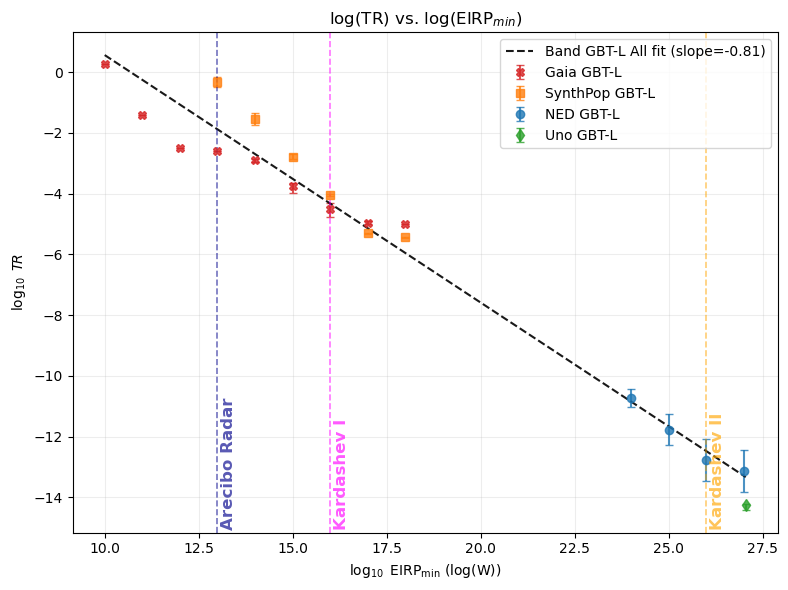

In [38]:
fig_tr = plot_logTR_vs_logEIRPmin(
    catalog_nested_dict = {'Gaia': {"GBT-L": gaia_shells_gbtl}, 'SynthPop': {"GBT-L": synthpop_shells_gbtl},
                           'NED': {"GBT-L": ned_shell_results_gbtl}, 'Uno': {"GBT-L": uno_summary_gbtl}},
    compare_mode='per_band_across_approaches',   # As we are analyzing all 4 approaches across GBT-L
    bands_to_compare=None,
    approaches_to_compare=None,
    overlay=True,
    colors=None,
    markers=None,
    show=True,
    return_slopes=False
)

## plot_density_colored_cmd_catalog_compare

Now let's plot 2 separate CMD's analyzing color and absolute magnitude from stars in Gaia and SynthPop GBT-L, using the viridis colormap for both plots:

In [43]:
gaia_stars_gbtl
synthpop_stars_gbtl

field_name   pop     iMass        age  Fe/H_initial      Mass  \
0         GJ1245B   0.0  0.149158  10.000000     -0.178166  0.149157   
1         GJ1245B   0.0  0.173522  10.000000      0.389643  0.173520   
2         GJ1245B   0.0  0.812597  10.000000      0.243806  0.812498   
3         GJ1245B   0.0  0.610818  10.000000      0.360758  0.610793   
4         GJ1245B   1.0  1.319564  14.000000     -2.569695  0.537832   
...           ...   ...       ...        ...           ...       ...   
517184   HIP99880  10.0  0.729551   7.300324     -0.318788  0.729477   
517185   HIP99880  10.0  0.338080   8.057407     -0.219669  0.338074   
517186   HIP99880  10.0  0.116211   9.907383      0.024499  0.116211   
517187   HIP99880  10.0  0.965262   8.768115     -0.428694  0.964713   
517188   HIP99880  10.0  0.105417   9.086960     -0.318383  0.105416   

        In_Final_Phase      Dist          ra        dec  ...  Gaia_BP_EDR3  \
0                  0.0  3.713963  298.464335  44.379556  ...     13.388204   
1                  0.0  5.187372  298.466070  44.379640  ...     16.592053   
2                  0.0  5.140013  298.513700  44.361038  ...      6.553292   
3                  0.0  6.665486  298.482655  44.387693  ...      9.205135   
4                  1.0  2.112896  298.493328  44.435786  ...           NaN   
...                ...       ...         ...        ...  ...           ...   
517184             0.0  9.979727  303.885138  42.959189  ...      6.458102   
517185             0.0  9.942760  303.962901  42.913578  ...     10.811757   
517186             0.0  9.940315  304.021853  42.991284  ...     15.513885   
517187             0.0  9.941240  304.033170  43.004727  ...      3.675939   
517188             0.0  9.945918  303.945512  42.951714  ...     14.705073   

        Gaia_RP_EDR3  Dim_Compact_Object_Flag      Dist_pc  theta_arcmin  \
0          10.858102                      0.0  3713.963445      2.141104   
1          12.305502                      0.0  5187.371960      2.111422   
2           5.399778                      0.0  5140.012719      3.402058   
3           7.280499                      0.0  6665.486105      1.517196   
4                NaN                      1.0  2112.895601      1.454382   
...              ...                      ...          ...           ...   
517184      5.451084                      0.0  9979.726746      3.880586   
517185      8.823656                      0.0  9942.760032      3.923550   
517186     12.075128                      0.0  9940.314616      2.422452   
517187      2.727296                      0.0  9941.240383      3.203264   
517188     11.845520                      0.0  9945.918385      1.933376   

        scaling_factor_percent          fmin    nu_rel  fwhm_arcmin  \
0                    83.515594  1.000000e-25  0.533333          8.4   
1                    83.930846  1.000000e-25  0.533333          8.4   
2                    63.458154  1.000000e-25  0.533333          8.4   
3                    91.351969  1.000000e-25  0.533333          8.4   
4                    92.024457  1.000000e-25  0.533333          8.4   
...                        ...           ...       ...          ...   
517184               55.337074  1.000000e-25  0.533333          8.4   
517185               54.612777  1.000000e-25  0.533333          8.4   
517186               79.406636  1.000000e-25  0.533333          8.4   
517187               66.818349  1.000000e-25  0.533333          8.4   
517188               86.339850  1.000000e-25  0.533333          8.4   

        logEIRPmin  
0        16.295909  
1        16.583975  
2        16.697443  
3        16.764947  
4        15.763855  
...            ...  
517184   17.333223  
517185   17.335721  
517186   17.172945  
517187   17.247987  
517188   17.137080  

[517189 rows x 43 columns]

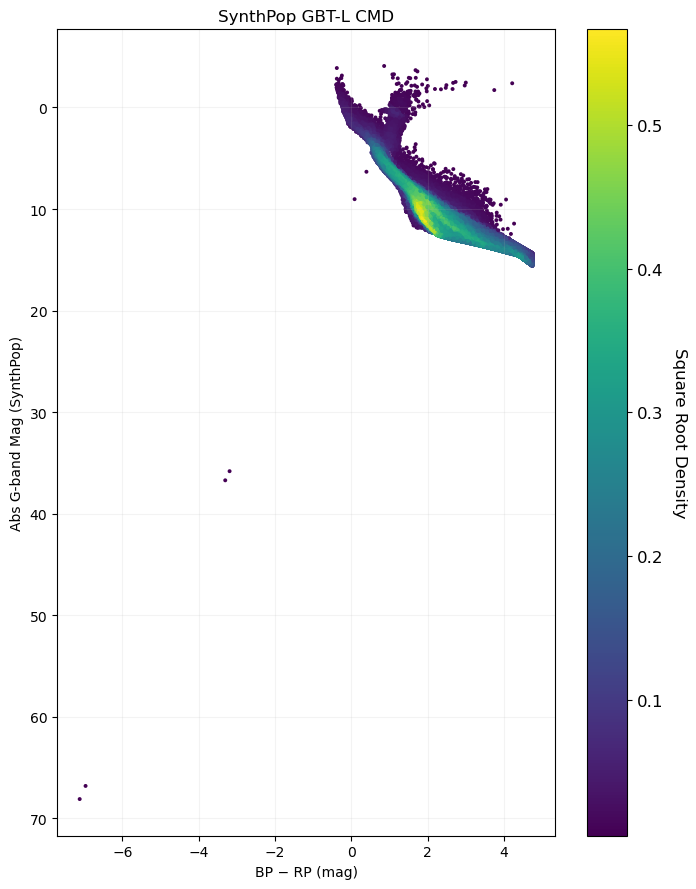

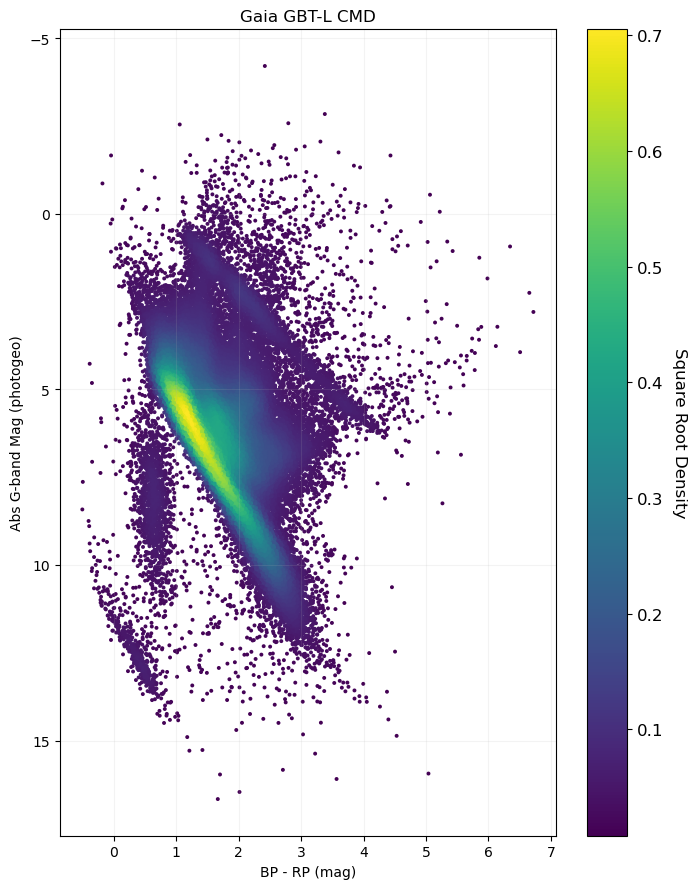

In [40]:
fig_cmd = plot_density_colored_cmd_catalog_compare(
    catalog_dict = {'Gaia': {'GBT-L': gaia_stars_gbtl}, 'SynthPop': {'GBT-L': synthpop_stars_gbtl}},
    bands_to_compare=None,
    overlay=False,
    cmap_names={('Gaia', 'GBT-L'): 'viridis', ('SynthPop', 'GBT-L'): 'viridis'},
    point_size=8,
    xlim=None, ylim=None,
    show=True,
    title=None
)

To access each figure, access first the list of figures [0], and then each figure [0][0] or [0][1]

To access each axis, access first the list of axes [1], and then each figure [1][0] or [1][1]

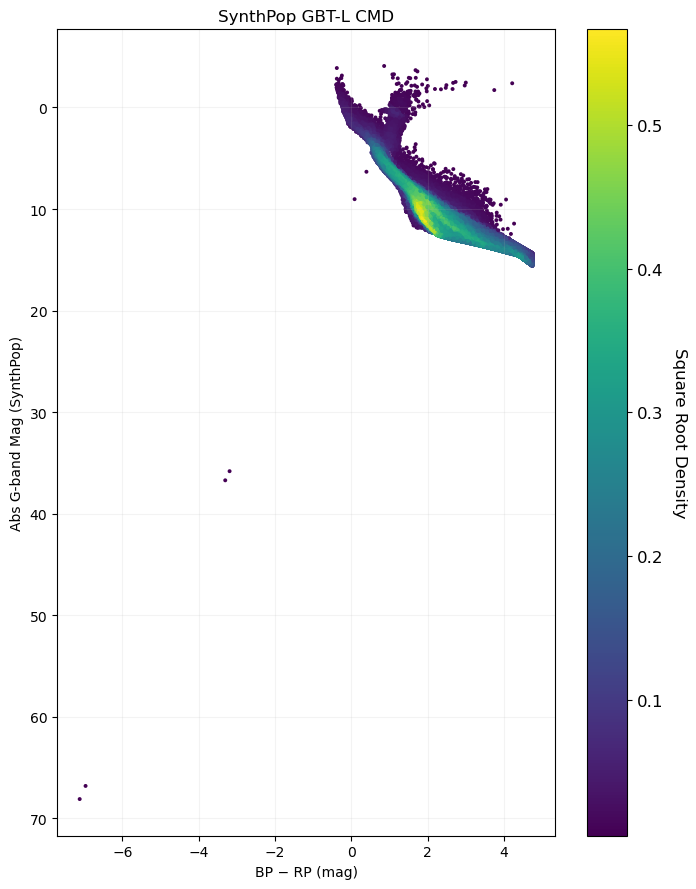

In [42]:
fig_cmd[0][0]

In [44]:
fig_cmd[1][0]

<Axes: title={'center': 'SynthPop GBT-L CMD'}, xlabel='BP − RP (mag)', ylabel='Abs G-band Mag (SynthPop)'>